# Pop Out Style Effect

## Import libraries

Install `transparent-background` library

In [ ]:
!pip install transparent-background

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from transparent_background import Remover

## Load image

In [ ]:
# load image
img = Image.open("scooter.jpg")

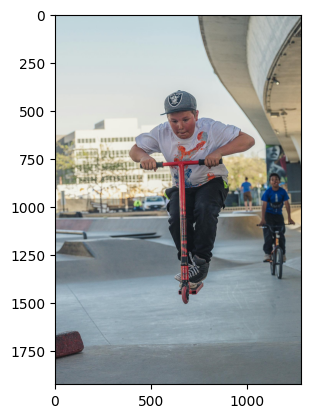

In [ ]:
# display image
plt.imshow(img)
plt.show()

In [ ]:
# check dimensions of the image
img.size

(1280, 1924)

## Create object mask

In [ ]:
remover = Remover()
mask = remover.process(img, type='map')

/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/transparent_background/Remover.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted b

Settings -> Mode=base, Device=cpu, Torchscript=disabled


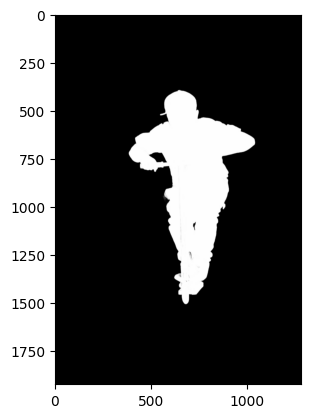

In [ ]:
plt.imshow(mask)
plt.show()

## Modify mask image

In [ ]:
# Ensure the image is in binary mode (black and white)
mask = mask.convert('1')

# convert PIL format images to numpy arrays
mask_array = np.array(mask)
img_array = np.array(img)

In [ ]:
# Draw the white rectangle by setting the relevant section of the array to 1 (white)
mask_array[790:1370, :] = 1

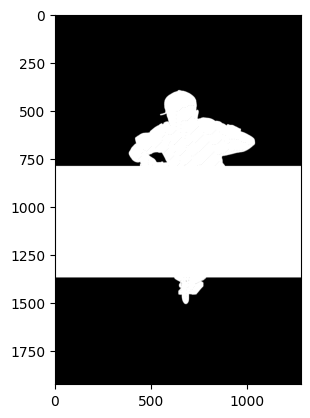

In [ ]:
plt.imshow(mask_array, cmap = 'gray')
plt.show()

**Insert 0** value for the pixels in the RGB image that correspond to the **black pixels** in the modified image.

## Apply mask to original image

In [ ]:
# create a copy of array
img_array_2 = img_array.copy()

# make selected pixels 0
img_array_2[mask_array == False] = 0

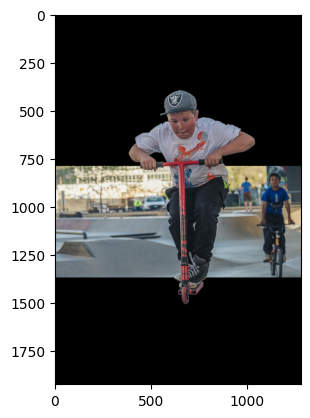

In [ ]:
plt.imshow(img_array_2)
plt.show()

## Add a background image

In [ ]:
# load image
bg = Image.open("background-1.jpg")

# convert PIL image to numpy array
bg_array = np.array(bg)

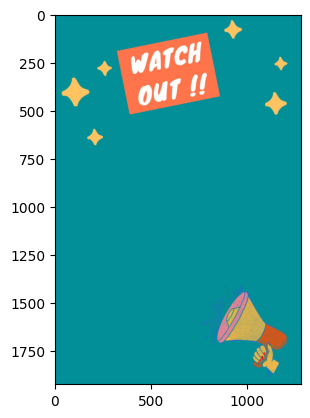

In [ ]:
# display image
plt.imshow(bg_array)
plt.show()

In [ ]:
# replace black pixels with pixels from another image
img_array_2[mask_array == False] = bg_array[mask_array == False]

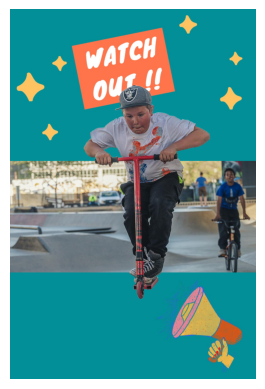

In [ ]:
plt.imshow(img_array_2)
plt.axis(False)
plt.show()

## Save result

In [ ]:
# convert numpy array to PIL image
final_img = Image.fromarray(img_array_2)

# save image
final_img.save("output.jpg")